# Rates of kilonovae and binary neutron star mergers

<b>Reference</b>: [Andreoni & Coughlin et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...918...63A/abstract); The Astrophysical Journal, Volume 918, Issue 2, id.63, 16 pp.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

from collections import OrderedDict

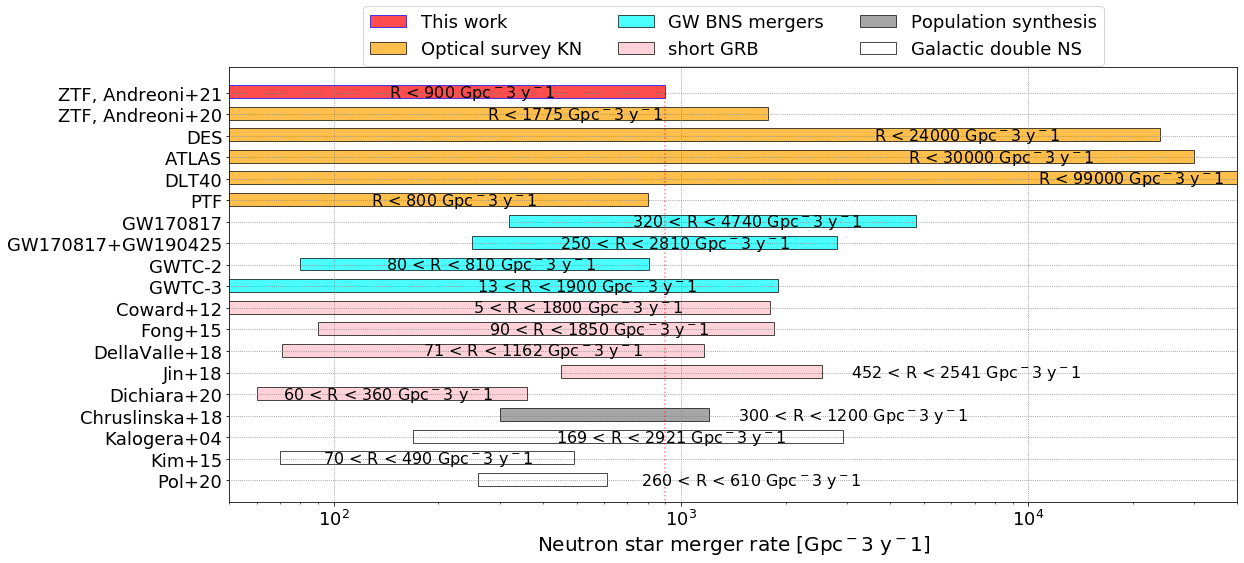

In [2]:
results = {
    'ZTF, Andreoni+21': {"rate": [0, 900], "category": "This work", "color":"red", "edgecolor":"blue"},
    'ZTF, Andreoni+20': {"rate": [0, 1775], "category": "Optical survey KN", "color":"orange", "edgecolor":"k"},
    'DES': {"rate": [0, 2.4e4], "category": "Optical survey KN", "color":"orange", "edgecolor":"k"}, 
    'ATLAS': {"rate": [0, 3.0e4], "category": "Optical survey KN", "color":"orange", "edgecolor":"k"},
    'DLT40': {"rate": [0, 9.9e4], "category": "Optical survey KN", "color":"orange", "edgecolor":"k"},
    'PTF': {"rate": [0, 800], "category": "Optical survey KN", "color":"orange", "edgecolor":"k"},
    'GW170817': {"rate": [1540-1220, 1540+3200], "category": "GW BNS mergers", "color":"cyan", "edgecolor":"k"},
    'GW170817+GW190425': {"rate": [250,2810], "category": "GW BNS mergers", "color":"cyan", "edgecolor":"k"},
    'GWTC-2': {"rate": [320-240,320+490], "category": "GW BNS mergers", "color":"cyan", "edgecolor":"k"},
    'GWTC-3': {"rate": [13,1900], "category": "GW BNS mergers", "color":"cyan", "edgecolor":"k"},
    'Coward+12': {"rate": [5,1800], "category": "short GRB", "color":"pink", "edgecolor":"k"},
    'Fong+15': {"rate": [270-180, 270+1580], "category": "short GRB", "color":"pink", "edgecolor":"k"},
    'DellaValle+18': {"rate": [352-281,352+810], "category": "short GRB", "color":"pink", "edgecolor":"k"},
    'Jin+18': {"rate": [1109-657,1109+1432], "category": "short GRB", "color":"pink", "edgecolor":"k"},
    'Dichiara+20': {"rate": [160-100,160+200], "category": "short GRB", "color":"pink", "edgecolor":"k"},
    'Chruslinska+18': {"rate": [ 600-300, 600+600], "category": "Population synthesis", "color":"grey", "edgecolor":"k"},
    'Kalogera+04': {"rate": [169, 2921], "category": "Galactic double NS", "color":"white", "edgecolor":"k"},
    'Kim+15': {"rate": [210-140, 210+280], "category": "Galactic double NS", "color":"white", "edgecolor":"k"},
    'Pol+20': {"rate": [370-110, 370+240], "category": "Galactic double NS", "color":"white", "edgecolor":"k"},
}


def chart(results):
    ylabels = list(results.keys())
    ilen=len(ylabels)
    pos = np.arange(0.5,ilen*0.5+0.5,0.5)
    rates = {}
    for i,facility in enumerate(ylabels):
        rates[facility] = results[facility]["rate"]
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    for i in range(len(ylabels)):
        start_rate, end_rate = results[ylabels[i]]["rate"]

        # Special treatment for binary evol. study
        if ylabels[i] == 'Chruslinska+18' or ylabels[i] == 'Jin+18' or ylabels[i] == 'Pol+20':
            xcenter = 2.6 * end_rate
            alpha = 0.7
        elif ylabels[i] == 'DLT40':
            xcenter = start_rate + (end_rate-start_rate) / 5
            alpha = 0.7
            
        else:
            xcenter = start_rate + (end_rate-start_rate) / 3.6
            alpha = 0.7
        
        ax.barh((i*0.5)+0.48, end_rate - start_rate, left=start_rate, height=0.3, 
                align='center', edgecolor=results[ylabels[i]]["edgecolor"],
                color=results[ylabels[i]]["color"], 
                label=results[ylabels[i]]["category"], alpha = alpha)

        # Special treatment for ztf
        if ylabels[i] == 'ZTF, Andreoni+21':
            # Plot vertical line for ZTF
            ax.plot([results[ylabels[i]]["rate"][1], results[ylabels[i]]["rate"][1]],
                    [100,(i*0.5)+0.5], "r:", alpha=0.5)
            
        text_color = "black"
        if results[ylabels[i]]["rate"][0] == 0:
            text_str = f"R < {int(results[ylabels[i]]['rate'][1])} Gpc$^{-3}$ y$^{-1}$"
        else:
            text_str = f"{int(results[ylabels[i]]['rate'][0])} < R < {int(results[ylabels[i]]['rate'][1])} Gpc$^{-3}$ y$^{-1}$"

        ax.text(xcenter, (i*0.5)+0.5, text_str, ha='center', va='center',
                    color=text_color, fontsize=16)
    locsy, labelsy = plt.yticks(pos,ylabels)
    plt.setp(labelsy, fontsize = 16)

    ax.set_xlim([50,4e4])
    ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)
    ax.grid(color = 'grey', linestyle = ':')
    ax.set_xlabel(f"Neutron star merger rate [Gpc$^{-3}$ y$^{-1}$]", fontsize=20)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='upper center',
                    bbox_to_anchor=(0.5, 1.16),
                    ncol=3, fancybox=True, shadow=False, fontsize=18, framealpha=0.8)
    
    ax.set_xscale("log")
    ax.tick_params(labelsize=18)
    ax.invert_yaxis()
    
    plt.subplots_adjust(left=0.2)

    plt.savefig("plot_rates_Andreoni2021.pdf", bbox_inches='tight')

    return fig, ax


chart(results)

plt.show()